# Problem set 3 starter notebook

This notebook gets you started on problem 3.

In [1]:
# Load helpers
# Will try to just load what I need on this

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Hints on R-squared for this function
* y = x + e, E(x)=E(e)=0
* E(y) is Naive forecast
* Think about sse1 = m*E(y-E(y))^2, two parts x and e added together

    * You should be able to find the variance of this
* Forecast for y = x, or E(y|x) = x
* sse2 = m*E(y-E(y|x))^2, now only one part to the error, e, what is the E(e^2)?
* From these two parts you should be able to get the theoretical R-squared
* It is also a nice comparison number for many of your computational results below

In [2]:
# Function to generate linear data experiments
def genLinData(M,N):
    # y = x_0 + eps
    # Other X values are noise
    X = np.random.normal(size=(M,N),loc=0,scale=1.)
    eps = np.random.normal(size=M,loc=0,scale=1.)
    # Y only depends on X[,0]
    y = X[:,0]+eps
    return X,y

In [4]:
# Generate some data and estimate a linear model as you would have done in econometrics class
X, y = genLinData(50, 1)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X,y))


0.519633808537473


In [5]:
# 1 find r-squared
# R-squared function setup
def rsquared(y,yhat,ycompare):
    RSS=np.sum((y-yhat)**2)
    yhatNaive=np.mean(ycompare)
    naiveRSS=np.sum((y-yhatNaive)**2)
    rs=1-RSS/naiveRSS
    return rs

yhat=lr.predict(X)
rsq=rsquared(y,yhat,y)
print('R-squared calculated with mathmatical function is: \n',rsq)

R-squared calculated with mathmatical function is: 
 0.519633808537473


In [8]:
# Now increase the number of noise terms to 9 (10 total predictors)
X, y = genLinData(50, 10)
# Now run regression
# print score, which is R-squared (fit)
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X,y))


0.6669199139194324


In [ ]:
#2
# It seems that increasing the noise terms from 1 to 9 increases the R score.
# This is due to the resean that noisse destroy information and make data becomes harder to fit, thus harder to over-fit.


In [15]:
#3

In [9]:
result=[]

for _ in range(1000):
    X=np.random.normal(size=(50,1),loc=0,scale=1)
    eps=np.random.normal(size=(50,1),loc=0,scale=1)
    y=X+eps
    lr=LinearRegression()
    fit=lr.fit(X,y)
    R=lr.score(X,y)
    result.append(R)
    
print('Mean of the score for n=1 is :',np.mean(result))

Mean of the score for n=1 is : 0.5039982705586928


In [16]:
result2=[]
for _ in range(1000):
    X,y=genLinData(50, 10)
    lr = LinearRegression()
    lr.fit(X, y)
    R=lr.score(X,y)
    result2.append(R)
print('Mean of the score for n=10 is :',np.mean(result2))

Mean of the score for n=10 is : 0.5925064626259706


In [11]:
#4
results=[]
results1=[]
for N in range(1,11):
    for i in range(1000):
       
        X,y=genLinData(50,N)
        lr=LinearRegression()
        fit=lr.fit(X,y)
        R=lr.score(X,y)
        results.append(R)
    results1.append(np.mean(results))
print(results1)


[0.5004379758921907, 0.5082904599526711, 0.5139165888923489, 0.517107629976478, 0.5219930298751487, 0.526970866550782, 0.5316305855385646, 0.5369238555469348, 0.5429177856163361, 0.5473747025125547]


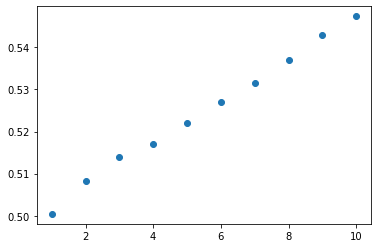

In [21]:

plt.plot(range(1,11),results1,"o")

In [22]:
#5
result3=[]
result4=[]
m=100
n=1
for _ in range(1000):
    X,y=genLinData(100, 1)
    lr=LinearRegression()
    X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.5)
    lr.fit(X_train,y_train)
    R_train=lr.score(X_train,y_train)
    R_test=lr.score(X_test,y_test)
    result3.append(R_train)
    result4.append(R_test)
print(R_train)
print('Mean of score for training set of n=1 is:',np.mean(result3))
print('Mean of score for testing set of n=1 is:',np.mean(result4))
    
    

0.644332801769544
Mean of score for training set of n=1 is: 0.4968404517183663
Mean of score for testing set of n=1 is: 0.45842003874256104


In [26]:
result5=[]
result6=[]
for _ in range(1000):
    X,y=genLinData(100, 10)
    lr=LinearRegression()
    lr.fit(X,y)
    X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.5)
    lr.fit(X_train,y_train)
    R_train=lr.score(X_train,y_train)
    R_test=lr.score(X_test,y_test)
    result5.append(R_train)
    result6.append(R_test)
print('Mean of score for training set of n=10 is:',np.mean(result5))
print('Mean of score for testing set of n=10 is:',np.mean(result6))


Mean of score for training set of n=10 is: 0.591627585118667
Mean of score for testing set of n=10 is: 0.3256890508369045


In [34]:
#6
result7=[]
result8=[]

for _ in range(1000):
    X,y=genLinData(1000, 1)
    lr=LinearRegression()
    X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.5)
    lr.fit(X_train,y_train)
    R_train=lr.score(X_train,y_train)
    R_test=lr.score(X_test,y_test)
    result7.append(R_train)
    result8.append(R_test)
print('Mean of score for training set of n=10 is:',np.mean(result7))
print('Mean of score for testing set of n=10 is:',np.mean(result8))

Mean of score for training set of n=10 is: 0.4997479185022236
Mean of score for testing set of n=10 is: 0.49619603159560244


In [35]:
np.random.seed(42)
result9=[]
result10=[]
m=1000
n=1
for _ in range(1000):
    X,y=genLinData(1000, 10)
    lr=LinearRegression()
    X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.5)
    lr.fit(X_train,y_train)
    R_train=lr.score(X_train,y_train)
    R_test=lr.score(X_test,y_test)
    result9.append(R_train)
    result10.append(R_test)
print('Mean of score for training set of n=1 is:',np.mean(result9))
print('Mean of score for testing set of n=1 is:',np.mean(result10))
#Increase in sample size decreases the overfitting compared with the scores between sample size 100 and sample size of 1000.

Mean of score for training set of n=1 is: 0.5090701057819567
Mean of score for testing set of n=1 is: 0.4880638021529752
